In [1]:
import h5py
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


# 1 / Exploration générale

In [2]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    print("Clés principales :", list(f.keys()))

Clés principales : ['#refs#', '#subsystem#', 'SC_FC_Connectomes']


In [3]:
with h5py.File(file_path, 'r') as f:
    
    # Explorer à nouveau le groupe #refs#
    refs_group = f['#refs#']
    print("Clés dans #refs# :", list(refs_group.keys()))
    
    # Afficher la forme de chaque sous-élément
    for key in refs_group.keys():
        item = refs_group[key]
        if isinstance(item, h5py.Dataset):
            print(f"{key}: shape={item.shape}, dtype={item.dtype}")
        else:
            print(f"{key}: Groupe interne")


Clés dans #refs# : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'ab', 'b', 'bb', 'c', 'cb', 'd', 'db', 'e', 'eb', 'f', 'fb', 'g', 'gb', 'h', 'hb', 'i', 'ib', 'j', 'jb', 'k', 'kb', 'l', 'lb', 'm', 'mb', 'n', 'nb', 'o', 'ob', 'p', 'pb', 'q', 'qb', 'r', 'rb', 's', 'sb', 't', 'tb', 'u', 'ub', 'v', 'vb', 'w', 'wb', 'x', 'xb', 'y', 'yb', 'z', 'zb']
0: shape=(1, 424), dtype=uint8
1: shape=(27, 129, 129), dtype=float32
2: shape=(27, 234, 234), dtype=float32
3: shape=(27, 463, 463), dtype=float32
4: shape=(27, 1015, 1015), dtype=float32
5: shape=(27, 83, 83), dtype=float32
6: shape=(27, 129, 129), dtype=float32
7: shape=(27, 234, 234), dtype=float32
8: shape=(27, 463, 463), dtype=float32
9: shape=(27, 1015, 1015), dtype=float32
A: shape=(27, 83, 83), dtype=float64
B: shape=(27, 129, 129), dtype=float64
C: shape=(27, 234, 234), dtype=float64
D: shape=(27, 4

In [4]:
with h5py.File(file_path, 'r') as f:
    
    # Explorer à nouveau le groupe #refs#
    subsystem_group = f['#subsystem#']
    print("Clés dans #subsystem# :", list(subsystem_group.keys()))
    
    # Afficher la forme de chaque sous-élément
    for key in subsystem_group.keys():
        item = subsystem_group[key]
        if isinstance(item, h5py.Dataset):
            print(f"{key}: shape={item.shape}, dtype={item.dtype}")
        else:
            print(f"{key}: Groupe interne")


Clés dans #subsystem# : ['MCOS']
MCOS: shape=(1, 13), dtype=object


In [5]:
with h5py.File(file_path, 'r') as f:
    
    # Explorer à nouveau le groupe #refs#
    SC_FC_Connectomes_group = f['SC_FC_Connectomes']
    print("Clés dans SC_FC_Connectomes_group :", list(SC_FC_Connectomes_group.keys()))
    
    # Afficher la forme de chaque sous-élément
    for key in SC_FC_Connectomes_group.keys():
        item = SC_FC_Connectomes_group[key]
        if isinstance(item, h5py.Dataset):
            print(f"{key}: shape={item.shape}, dtype={item.dtype}")
        else:
            print(f"{key}: Groupe interne")


Clés dans SC_FC_Connectomes_group : ['FC_correlation', 'SC_ADC', 'SC_density', 'SC_gFA', 'SC_length_of_fibers', 'SC_number_of_fibers', 'demographics']
FC_correlation: Groupe interne
SC_ADC: Groupe interne
SC_density: Groupe interne
SC_gFA: Groupe interne
SC_length_of_fibers: Groupe interne
SC_number_of_fibers: Groupe interne
demographics: shape=(1, 6), dtype=uint32


| **Clé**                  | **Description**                                                                                     |
|--------------------------|----------------------------------------------------------------------------------------------------|
| `FC_correlation`         | Matrices de connectivité fonctionnelle (corrélation BOLD entre régions).                           |
| `SC_ADC`                 | Coefficient de diffusion apparent (diffusion de l'eau dans la matière blanche).                    |
| `SC_density`             | Densité des fibres structurelles (nombre de fibres reliant deux régions).                          |
| `SC_gFA`                 | Anisotropie fractionnelle généralisée (intégrité et directionnalité des fibres).                   |
| `SC_length_of_fibers`    | Longueur moyenne des fibres entre deux régions.                                                    |
| `SC_number_of_fibers`    | Nombre total de fibres connectant deux régions.                                                    |
| `demographics`           | Informations sur les sujets (âge, sexe, groupe : CTRL ou SCHZ).                                    |


## 2 / Exploration SC_FC_Connectomes

### 2.1 / Exploration générale

In [6]:
with h5py.File(file_path, 'r') as f:
    # On accède au groupe principal contenant les matrices SC et FC
    scfc_group = f['SC_FC_Connectomes']
    
    # On parcourt toutes les clés présentes dans ce groupe
    for key in scfc_group.keys():
        item = scfc_group[key]
        
        # Si la clé correspond à un groupe (ex: FC_correlation, SC_density, etc.)
        if isinstance(item, h5py.Group):
            print(f" Groupe: {key}")
            
            # Chaque groupe contient deux sous-dossiers : 'ctrl' et 'schz' (sauf demographics)
            for sub_key in item.keys():
                sub_item = item[sub_key]
                
                # On affiche la forme et le type des données contenues dans chaque sous-groupe
                print(f"   {sub_key}: shape={sub_item.shape}, dtype={sub_item.dtype}")
                
                # Ces sous-dossiers contiennent des références à d'autres objets HDF5
                print(f"  Aperçu des données : {sub_item[...]}")  # Affiche un aperçu du contenu

        # Si la clé correspond directement à un dataset (ex: demographics)
        else:
            print(f" Dataset: {key}, shape={item.shape}, dtype={item.dtype}")
            
            # Affichage du contenu du dataset (ex: les informations démographiques)
            print(f"  Aperçu des données : {item[...]}")


 Groupe: FC_correlation
   ctrl: shape=(5, 1), dtype=object
  Aperçu des données : [[<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]]
   schz: shape=(5, 1), dtype=object
  Aperçu des données : [[<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]]
 Groupe: SC_ADC
   ctrl: shape=(5, 1), dtype=object
  Aperçu des données : [[<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]]
   schz: shape=(5, 1), dtype=object
  Aperçu des données : [[<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]]
 Groupe: SC_density
   ctrl: shape=(5, 1), dtype=object
  Aperçu des données : [[<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object reference>]
 [<HDF5 object refer

### 2.2 / FC_correlation

In [7]:
with h5py.File(file_path, 'r') as f:
    
    # Accède au sous-groupe 'ctrl' dans 'FC_correlation' du groupe 'SC_FC_Connectomes'
    # Ce sous-groupe contient des références vers les matrices FC des sujets contrôles
    group = f['SC_FC_Connectomes/FC_correlation']['ctrl']
    
    # Parcourt toutes les références d'objets dans la colonne 0 du groupe (5 références)
    for i, ref in enumerate(group[:, 0]):  
        
        # Utilise chaque référence pour accéder aux datasets réels dans le fichier HDF5
        obj = f[ref]
        
        # Affiche la forme et le type de données de chaque objet référencé
        print(f"Référence {i+1}: shape={obj.shape}, dtype={obj.dtype}")


Référence 1: shape=(27, 83, 83), dtype=float32
Référence 2: shape=(27, 129, 129), dtype=float32
Référence 3: shape=(27, 234, 234), dtype=float32
Référence 4: shape=(27, 463, 463), dtype=float32
Référence 5: shape=(27, 1015, 1015), dtype=float32


Chaque référence contient donc les matrice FC des 27 patients ctrl ou schz. Les 5 références correspondent à la résolution choisie (83 régions, 129...). 

On peux maintenant afficher un exemple de matrice FC pour les patients ctrl et schz. On étudiera plus tard leur similitudes et différences.

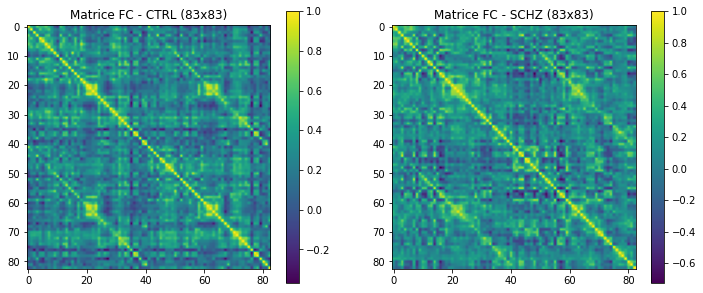

In [8]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    # Accéder aux références d'objets FC pour CTRL et SCHZ
    ctrl_ref = f['SC_FC_Connectomes/FC_correlation']['ctrl'][0, 0]  # Première référence pour CTRL (les matrices sont de taille 83x83, premiere composante à passer à 1, 2... pour meilleur résolution)
    schz_ref = f['SC_FC_Connectomes/FC_correlation']['schz'][0, 0]  # Première référence pour SCHZ (les matrices sont de taille 83x83)
    
    # Charger les matrices référencées
    ctrl_fc = f[ctrl_ref][0]  # Prend la première matrice du groupe CTRL (83x83)
    schz_fc = f[schz_ref][0]  # Prend la première matrice du groupe SCHZ (83x83)

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ctrl_fc, cmap='viridis')
plt.title('Matrice FC - CTRL (83x83)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(schz_fc, cmap='viridis')
plt.title('Matrice FC - SCHZ (83x83)')
plt.colorbar()

plt.show()


### 2.3 / SC_ADC

In [9]:
# Ouvre le fichier HDF5 en mode lecture seule
with h5py.File(file_path, 'r') as f:
    
    # Accède au sous-groupe 'ctrl' dans 'SC_ADC' du groupe 'SC_FC_Connectomes'
    # Ce sous-groupe contient des références vers les matrices FC des sujets contrôles
    group = f['SC_FC_Connectomes/SC_ADC']['ctrl']
    
    # Parcourt toutes les références d'objets dans la colonne 0 du groupe (5 références)
    for i, ref in enumerate(group[:, 0]):  
        
        # Utilise chaque référence pour accéder aux datasets réels dans le fichier HDF5
        obj = f[ref]
        
        # Affiche la forme et le type de données de chaque objet référencé
        print(f"Référence {i+1}: shape={obj.shape}, dtype={obj.dtype}")


Référence 1: shape=(27, 83, 83), dtype=float64
Référence 2: shape=(27, 129, 129), dtype=float64
Référence 3: shape=(27, 234, 234), dtype=float64
Référence 4: shape=(27, 463, 463), dtype=float64
Référence 5: shape=(27, 1015, 1015), dtype=float64


Chaque référence contient donc les matrice SC des 27 patients ctrl ou schz. Les 5 références correspondent à la résolution choisie (83 régions, 129...). 

On peux maintenant afficher un exemple de matrice FC pour les patients ctrl et schz. On étudiera plus tard leur similitudes et différences.

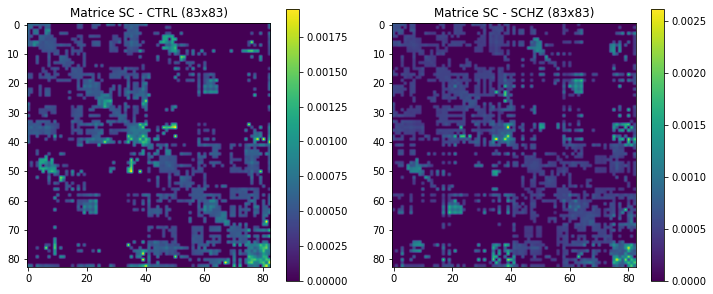

In [10]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    # Accéder aux références d'objets SC_ADC pour CTRL et SCHZ
    ctrl_ref = f['SC_FC_Connectomes/SC_ADC']['ctrl'][0, 0]  # Première référence pour CTRL (les matrices sont de taille 83x83)
    schz_ref = f['SC_FC_Connectomes/SC_ADC']['schz'][0, 0]  # Première référence pour SCHZ (les matrices sont de taille 83x83)
    
    # Charger les matrices référencées
    ctrl_fc = f[ctrl_ref][0]  # Prend la première matrice du groupe CTRL (83x83)
    schz_fc = f[schz_ref][0]  # Prend la première matrice du groupe SCHZ (83x83)

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ctrl_fc, cmap='viridis')
plt.title('Matrice SC - CTRL (83x83)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(schz_fc, cmap='viridis')
plt.title('Matrice SC - SCHZ (83x83)')
plt.colorbar()

plt.show()


### 2.4 / SC_density

In [12]:
# Ouvre le fichier HDF5 en mode lecture seule
with h5py.File(file_path, 'r') as f:
    
    # Accède au sous-groupe 'ctrl' dans 'SC_density' du groupe 'SC_FC_Connectomes'
    # Ce sous-groupe contient des références vers les matrices SC_density des sujets contrôles
    group = f['SC_FC_Connectomes/SC_density']['ctrl']
    
    # Parcourt toutes les références d'objets dans la colonne 0 du groupe (5 références)
    for i, ref in enumerate(group[:, 0]):  
        
        # Utilise chaque référence pour accéder aux datasets réels dans le fichier HDF5
        obj = f[ref]
        
        # Affiche la forme et le type de données de chaque objet référencé
        print(f"Référence {i+1}: shape={obj.shape}, dtype={obj.dtype}")


Référence 1: shape=(27, 83, 83), dtype=float64
Référence 2: shape=(27, 129, 129), dtype=float64
Référence 3: shape=(27, 234, 234), dtype=float64
Référence 4: shape=(27, 463, 463), dtype=float64
Référence 5: shape=(27, 1015, 1015), dtype=float64


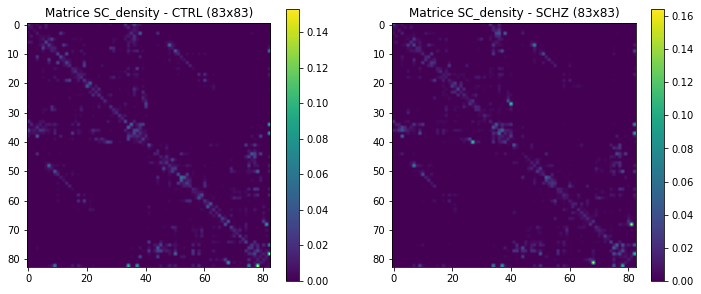

In [13]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    # Accéder aux références d'objets SC_density pour CTRL et SCHZ
    ctrl_ref = f['SC_FC_Connectomes/SC_density']['ctrl'][0, 0]  # Première référence pour CTRL (les matrices sont de taille 83x83)
    schz_ref = f['SC_FC_Connectomes/SC_density']['schz'][0, 0]  # Première référence pour SCHZ (les matrices sont de taille 83x83)
    
    # Charger les matrices référencées
    ctrl_fc = f[ctrl_ref][0]  # Prend la première matrice du groupe CTRL (83x83)
    schz_fc = f[schz_ref][0]  # Prend la première matrice du groupe SCHZ (83x83)

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ctrl_fc, cmap='viridis')
plt.title('Matrice SC_density - CTRL (83x83)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(schz_fc, cmap='viridis')
plt.title('Matrice SC_density - SCHZ (83x83)')
plt.colorbar()

plt.show()


### 2.5 / SC_gFA

In [14]:
# Ouvre le fichier HDF5 en mode lecture seule
with h5py.File(file_path, 'r') as f:
    
    # Accède au sous-groupe 'ctrl' dans 'SC_gFA' du groupe 'SC_FC_Connectomes'
    # Ce sous-groupe contient des références vers les matrices FC des sujets contrôles
    group = f['SC_FC_Connectomes/SC_gFA']['ctrl']
    
    # Parcourt toutes les références d'objets dans la colonne 0 du groupe (5 références)
    for i, ref in enumerate(group[:, 0]):  
        
        # Utilise chaque référence pour accéder aux datasets réels dans le fichier HDF5
        obj = f[ref]
        
        # Affiche la forme et le type de données de chaque objet référencé
        print(f"Référence {i+1}: shape={obj.shape}, dtype={obj.dtype}")


Référence 1: shape=(27, 83, 83), dtype=float64
Référence 2: shape=(27, 129, 129), dtype=float64
Référence 3: shape=(27, 234, 234), dtype=float64
Référence 4: shape=(27, 463, 463), dtype=float64
Référence 5: shape=(27, 1015, 1015), dtype=float64


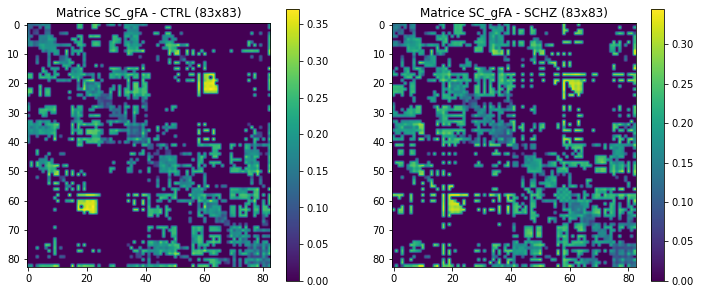

In [15]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    # Accéder aux références d'objets SC_gFA pour CTRL et SCHZ
    ctrl_ref = f['SC_FC_Connectomes/SC_gFA']['ctrl'][0, 0]  # Première référence pour CTRL (les matrices sont de taille 83x83)
    schz_ref = f['SC_FC_Connectomes/SC_gFA']['schz'][0, 0]  # Première référence pour SCHZ (les matrices sont de taille 83x83)
    
    # Charger les matrices référencées
    ctrl_fc = f[ctrl_ref][0]  # Prend la première matrice du groupe CTRL (83x83)
    schz_fc = f[schz_ref][0]  # Prend la première matrice du groupe SCHZ (83x83)

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ctrl_fc, cmap='viridis')
plt.title('Matrice SC_gFA - CTRL (83x83)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(schz_fc, cmap='viridis')
plt.title('Matrice SC_gFA - SCHZ (83x83)')
plt.colorbar()

plt.show()


### 2.6 / SC_length_of_fibers

In [16]:
# Ouvre le fichier HDF5 en mode lecture seule
with h5py.File(file_path, 'r') as f:
    
    # Accède au sous-groupe 'ctrl' dans 'SC_length_of_fibers' du groupe 'SC_FC_Connectomes'
    # Ce sous-groupe contient des références vers les matrices SC_length_of_fibers des sujets contrôles
    group = f['SC_FC_Connectomes/SC_length_of_fibers']['ctrl']
    
    # Parcourt toutes les références d'objets dans la colonne 0 du groupe (5 références)
    for i, ref in enumerate(group[:, 0]):  
        
        # Utilise chaque référence pour accéder aux datasets réels dans le fichier HDF5
        obj = f[ref]
        
        # Affiche la forme et le type de données de chaque objet référencé
        print(f"Référence {i+1}: shape={obj.shape}, dtype={obj.dtype}")


Référence 1: shape=(27, 83, 83), dtype=float64
Référence 2: shape=(27, 129, 129), dtype=float64
Référence 3: shape=(27, 234, 234), dtype=float64
Référence 4: shape=(27, 463, 463), dtype=float64
Référence 5: shape=(27, 1015, 1015), dtype=float64


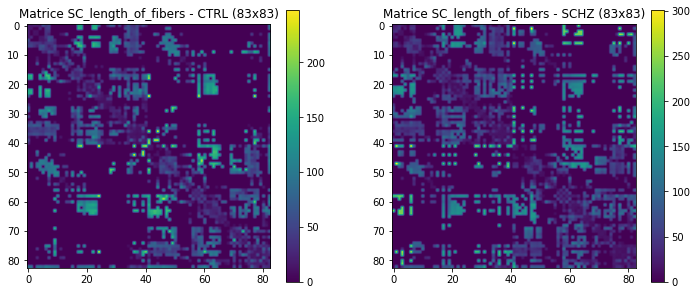

In [17]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    # Accéder aux références d'objets SC_length_of_fibers pour CTRL et SCHZ
    ctrl_ref = f['SC_FC_Connectomes/SC_length_of_fibers']['ctrl'][0, 0]  # Première référence pour CTRL (les matrices sont de taille 83x83)
    schz_ref = f['SC_FC_Connectomes/SC_length_of_fibers']['schz'][0, 0]  # Première référence pour SCHZ (les matrices sont de taille 83x83)
    
    # Charger les matrices référencées
    ctrl_fc = f[ctrl_ref][0]  # Prend la première matrice du groupe CTRL (83x83)
    schz_fc = f[schz_ref][0]  # Prend la première matrice du groupe SCHZ (83x83)

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ctrl_fc, cmap='viridis')
plt.title('Matrice SC_length_of_fibers - CTRL (83x83)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(schz_fc, cmap='viridis')
plt.title('Matrice SC_length_of_fibers - SCHZ (83x83)')
plt.colorbar()

plt.show()


### 2.7 / SC_number_of_fibers

In [18]:
# Ouvre le fichier HDF5 en mode lecture seule
with h5py.File(file_path, 'r') as f:
    
    # Accède au sous-groupe 'ctrl' dans 'SC_number_of_fibers' du groupe 'SC_FC_Connectomes'
    # Ce sous-groupe contient des références vers les matrices FC des sujets contrôles
    group = f['SC_FC_Connectomes/SC_number_of_fibers']['ctrl']
    
    # Parcourt toutes les références d'objets dans la colonne 0 du groupe (5 références)
    for i, ref in enumerate(group[:, 0]):  
        
        # Utilise chaque référence pour accéder aux datasets réels dans le fichier HDF5
        obj = f[ref]
        
        # Affiche la forme et le type de données de chaque objet référencé
        print(f"Référence {i+1}: shape={obj.shape}, dtype={obj.dtype}")


Référence 1: shape=(27, 83, 83), dtype=float64
Référence 2: shape=(27, 129, 129), dtype=float64
Référence 3: shape=(27, 234, 234), dtype=float64
Référence 4: shape=(27, 463, 463), dtype=float64
Référence 5: shape=(27, 1015, 1015), dtype=float64


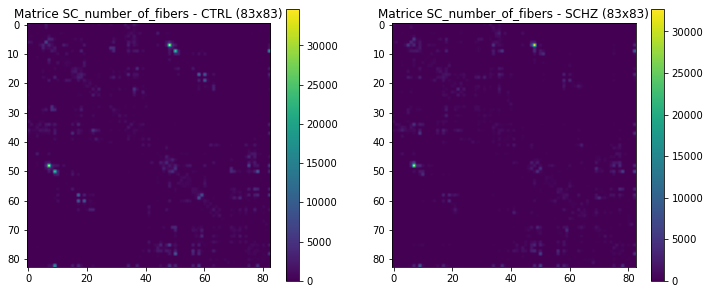

In [19]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    # Accéder aux références d'objets SC_number_of_fibers pour CTRL et SCHZ
    ctrl_ref = f['SC_FC_Connectomes/SC_number_of_fibers']['ctrl'][0, 0]  # Première référence pour CTRL (les matrices sont de taille 83x83)
    schz_ref = f['SC_FC_Connectomes/SC_number_of_fibers']['schz'][0, 0]  # Première référence pour SCHZ (les matrices sont de taille 83x83)
    
    # Charger les matrices référencées
    ctrl_fc = f[ctrl_ref][0]  # Prend la première matrice du groupe CTRL (83x83)
    schz_fc = f[schz_ref][0]  # Prend la première matrice du groupe SCHZ (83x83)

# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(ctrl_fc, cmap='viridis')
plt.title('Matrice SC_number_of_fibers - CTRL (83x83)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(schz_fc, cmap='viridis')
plt.title('Matrice SC_number_of_fibers - SCHZ (83x83)')
plt.colorbar()

plt.show()


### 2.8 / demographics

In [20]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    # Accéder au dataset 'demographics'
    demographics = f['SC_FC_Connectomes/demographics']
    
    # Afficher la forme, le type et les valeurs
    print(f"Shape : {demographics.shape}, Type : {demographics.dtype}")
    print("Données démographiques :")
    print(demographics[...])  # Affiche tout le contenu


Shape : (1, 6), Type : uint32
Données démographiques :
[[3707764736          2          1          1          1          2]]


Je ne comprends pas bien la signification, mais ça me semble peu important pour notre travail. C'est surement des méta data genre le timestamp, le nombre d'image faite par personne, ou autre.

## 3 / Exploration subsystem - Ref

In [22]:
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'

with h5py.File(file_path, 'r') as f:
    subsystem_group = f['#subsystem#']['MCOS']
    
    print(f"Shape : {subsystem_group.shape}, Type : {subsystem_group.dtype}")
    print("Contenu de MCOS :")
    print(subsystem_group[...])  # Affiche tout le contenu


Shape : (1, 13), Type : object
Contenu de MCOS :
[[<HDF5 object reference> <HDF5 object reference> <HDF5 object reference>
  <HDF5 object reference> <HDF5 object reference> <HDF5 object reference>
  <HDF5 object reference> <HDF5 object reference> <HDF5 object reference>
  <HDF5 object reference> <HDF5 object reference> <HDF5 object reference>
  <HDF5 object reference>]]


In [23]:
with h5py.File(file_path, 'r') as f:
    print("Clés principales :", list(f.keys()))
    
    # Explorer à nouveau le groupe #refs#
    refs_group = f['#refs#']
    print("Clés dans #refs# :", list(refs_group.keys()))
    
    # Afficher la forme de chaque sous-élément
    for key in refs_group.keys():
        item = refs_group[key]
        if isinstance(item, h5py.Dataset):
            print(f"{key}: shape={item.shape}, dtype={item.dtype}")
        else:
            print(f"{key}: Groupe interne")

# Hypothèse : Le dataset avec shape (54, 83, 83) est celui qu'on cherche.


Clés principales : ['#refs#', '#subsystem#', 'SC_FC_Connectomes']
Clés dans #refs# : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'ab', 'b', 'bb', 'c', 'cb', 'd', 'db', 'e', 'eb', 'f', 'fb', 'g', 'gb', 'h', 'hb', 'i', 'ib', 'j', 'jb', 'k', 'kb', 'l', 'lb', 'm', 'mb', 'n', 'nb', 'o', 'ob', 'p', 'pb', 'q', 'qb', 'r', 'rb', 's', 'sb', 't', 'tb', 'u', 'ub', 'v', 'vb', 'w', 'wb', 'x', 'xb', 'y', 'yb', 'z', 'zb']
0: shape=(1, 424), dtype=uint8
1: shape=(27, 129, 129), dtype=float32
2: shape=(27, 234, 234), dtype=float32
3: shape=(27, 463, 463), dtype=float32
4: shape=(27, 1015, 1015), dtype=float32
5: shape=(27, 83, 83), dtype=float32
6: shape=(27, 129, 129), dtype=float32
7: shape=(27, 234, 234), dtype=float32
8: shape=(27, 463, 463), dtype=float32
9: shape=(27, 1015, 1015), dtype=float32
A: shape=(27, 83, 83), dtype=float64
B: shape=(27, 129, 129), dt

Rien de plus que les références (infos de SC_FC_Connectom_Group et subsystem), donc aucune infos supplémentaires ici.

## 4 / Label

In [24]:
file_path = 'DataSetLausanne/labels_index_CORTICAL_Laus2008_all_scales.mat'

labels_data = sio.loadmat(file_path)  # Charger le fichier

# Affiche les clés du fichier
print(f"Clés disponibles : {list(labels_data.keys())}")

# Affiche le contenu pour chaque clé
for key in labels_data:
    if not key.startswith('__'):
        print(f"{key}: {labels_data[key]}")


Clés disponibles : ['__header__', '__version__', '__globals__', 'ixc', 'llist']
ixc: [[array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
          33, 34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
          56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
          72, 73, 74, 75]], dtype=uint8)
  array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
           14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
           27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
           40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
           53,  54,  55,  56,  57,  65,  66,  67,  68,  69,  70,  71,  72,
           73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
           86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
           99, 100, 101, 102, 103, 104, 105, 106, 107

header, version, et globals sont des metadata qui donnent des informations sur le fichier matlab, donc rien d'important. On va se concentrer sur ixc, et llist.

### 4.1 / IXC

In [25]:
file_path = 'DataSetLausanne/labels_index_CORTICAL_Laus2008_all_scales.mat'

# Charger le fichier
labels_data = sio.loadmat(file_path)

# Extraire les indices corticaux
ixc = labels_data['ixc']  # Contient les indices pour toutes les échelles

# Afficher les indices pour chaque échelle
for i, indices in enumerate(ixc[0]):  # ixc est un tableau de tableaux
    print(f"Indices corticaux pour l'échelle {i+1} :")
    print(indices[0])  # Affiche les indices d'une échelle
    print("-" * 50)


Indices corticaux pour l'échelle 1 :
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
--------------------------------------------------
Indices corticaux pour l'échelle 2 :
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121]
--------------------------------------------------
Indices corticaux pour l'échelle 3 :
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  

Le tableau `ixc` extrait de `labels_index_CORTICAL_Laus2008_all_scales.mat` contient les **indices des régions corticales** pour différentes **résolutions** de l'atlas Lausanne2008 (83, 129, 234, 463, 1015 régions).

- Chaque tableau dans `ixc` correspond à une **échelle spécifique**.
- Les indices listés représentent **uniquement les régions corticales**, en excluant les régions sous-corticales, le tronc cérébral et certaine régions corticales frontalières.
- Par exemple, pour l'échelle 83 régions, `ixc` contient 68 indices (les 68 régions corticales).

Il :
- Permet de **filtrer les matrices SC et FC** pour ne garder que les connexions corticales.
- Est utile pour analyser spécifiquement le **cortex cérébral** sans inclure les structures sous-corticales.


In [26]:
# Charger les indices corticaux
labels_file = 'DataSetLausanne/labels_index_CORTICAL_Laus2008_all_scales.mat'
labels_data = sio.loadmat(labels_file)
cortical_indices_83 = labels_data['ixc'][0, 0].flatten() - 1  # Indices pour l'échelle 83

# Charger les matrices SC et FC depuis SC_FC_Connectomes
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'
with h5py.File(file_path, 'r') as f:
    # Accéder aux matrices SC et FC (exemple avec SC_density et FC_correlation)
    SC_ctrl = f['SC_FC_Connectomes/SC_density']['ctrl'][0, 0]
    SC_schz = f['SC_FC_Connectomes/SC_density']['schz'][0, 0]
    FC_ctrl = f['SC_FC_Connectomes/FC_correlation']['ctrl'][0, 0]
    FC_schz = f['SC_FC_Connectomes/FC_correlation']['schz'][0, 0]

    # Charger les matrices
    SC_ctrl = f[SC_ctrl][:]
    SC_schz = f[SC_schz][:]
    FC_ctrl = f[FC_ctrl][:]
    FC_schz = f[FC_schz][:]
    
    # Appliquer le masque cortical aux matrices
    SC_ctrl_cortical = SC_ctrl[:, cortical_indices_83, :][:, :, cortical_indices_83]
    SC_schz_cortical = SC_schz[:, cortical_indices_83, :][:, :, cortical_indices_83]
    FC_ctrl_cortical = FC_ctrl[:, cortical_indices_83, :][:, :, cortical_indices_83]
    FC_schz_cortical = FC_schz[:, cortical_indices_83, :][:, :, cortical_indices_83]

# Afficher les nouvelles formes
print(f"SC CTRL cortical shape: {SC_ctrl_cortical.shape}")
print(f"SC SCHZ cortical shape: {SC_schz_cortical.shape}")
print(f"FC CTRL cortical shape: {FC_ctrl_cortical.shape}")
print(f"FC SCHZ cortical shape: {FC_schz_cortical.shape}")


SC CTRL cortical shape: (27, 68, 68)
SC SCHZ cortical shape: (27, 68, 68)
FC CTRL cortical shape: (27, 68, 68)
FC SCHZ cortical shape: (27, 68, 68)


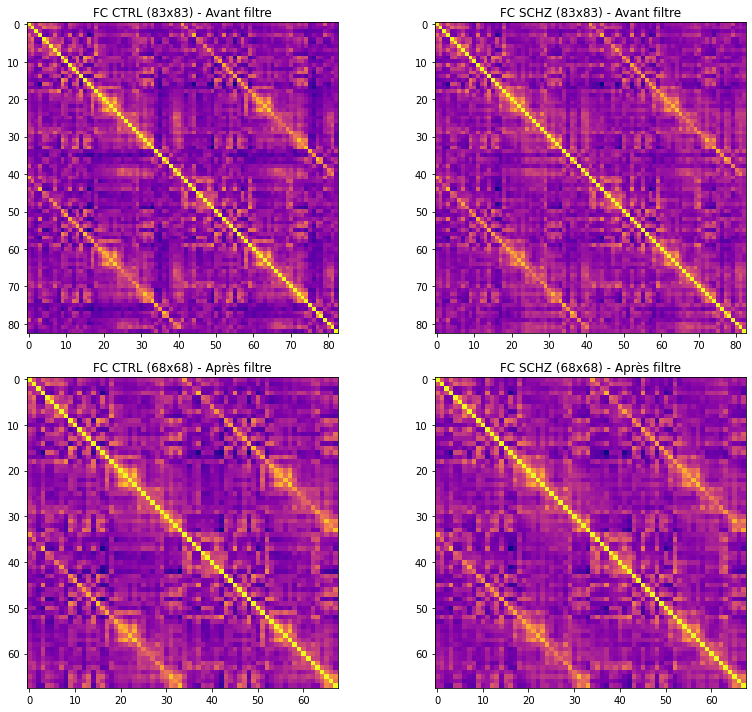

In [27]:
# Chemins des fichiers
file_path = 'DataSetLausanne/27_SCHZ_CTRL_dataset.mat'
labels_path = 'DataSetLausanne/labels_index_CORTICAL_Laus2008_all_scales.mat'

# Charger les indices corticaux
labels_data = sio.loadmat(labels_path)
cortical_indices = labels_data['ixc'][0, 0].flatten() - 1  # MATLAB indexation

# Charger les matrices FC
with h5py.File(file_path, 'r') as f:
    FC_ctrl = f['SC_FC_Connectomes/FC_correlation/ctrl'][0, 0]  # Référence
    FC_schz = f['SC_FC_Connectomes/FC_correlation/schz'][0, 0]  # Référence

    FC_ctrl_data = f[FC_ctrl][:]
    FC_schz_data = f[FC_schz][:]

# Appliquer le masque cortical
FC_ctrl_cortical = FC_ctrl_data[:, cortical_indices, :][:, :, cortical_indices]
FC_schz_cortical = FC_schz_data[:, cortical_indices, :][:, :, cortical_indices]

# Moyennes pour visualisation
mean_FC_ctrl = np.mean(FC_ctrl_data, axis=0)
mean_FC_schz = np.mean(FC_schz_data, axis=0)
mean_FC_ctrl_cortical = np.mean(FC_ctrl_cortical, axis=0)
mean_FC_schz_cortical = np.mean(FC_schz_cortical, axis=0)

# Affichage
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].imshow(mean_FC_ctrl, cmap='plasma')
ax[0, 0].set_title('FC CTRL (83x83) - Avant filtre')

ax[0, 1].imshow(mean_FC_schz, cmap='plasma')
ax[0, 1].set_title('FC SCHZ (83x83) - Avant filtre')

ax[1, 0].imshow(mean_FC_ctrl_cortical, cmap='plasma')
ax[1, 0].set_title('FC CTRL (68x68) - Après filtre')

ax[1, 1].imshow(mean_FC_schz_cortical, cmap='plasma')
ax[1, 1].set_title('FC SCHZ (68x68) - Après filtre')

plt.tight_layout()
plt.show()


### 4.2 / llist

In [28]:
# Charger le fichier
labels_file = 'DataSetLausanne/labels_index_CORTICAL_Laus2008_all_scales.mat'
labels_data = sio.loadmat(labels_file)

# Explorer la clé 'llist'
llist = labels_data['llist']
print("Contenu de llist :")
print(llist)


Contenu de llist :
[[array([[array(['rh_lateralorbitofrontal'], dtype='<U23')],
         [array(['rh_parsorbitalis'], dtype='<U16')],
         [array(['rh_frontalpole'], dtype='<U14')],
         [array(['rh_medialorbitofrontal'], dtype='<U22')],
         [array(['rh_parstriangularis'], dtype='<U19')],
         [array(['rh_parsopercularis'], dtype='<U18')],
         [array(['rh_rostralmiddlefrontal'], dtype='<U23')],
         [array(['rh_superiorfrontal'], dtype='<U18')],
         [array(['rh_caudalmiddlefrontal'], dtype='<U22')],
         [array(['rh_precentral'], dtype='<U13')],
         [array(['rh_paracentral'], dtype='<U14')],
         [array(['rh_rostralanteriorcingulate'], dtype='<U27')],
         [array(['rh_caudalanteriorcingulate'], dtype='<U26')],
         [array(['rh_posteriorcingulate'], dtype='<U21')],
         [array(['rh_isthmuscingulate'], dtype='<U19')],
         [array(['rh_postcentral'], dtype='<U14')],
         [array(['rh_supramarginal'], dtype='<U16')],
         [

In [29]:
print(llist.shape)
print(llist.dtype)

print(llist[0, 0].shape)
print(llist[0, 1].shape)
print(llist[0, 2].shape)

print(llist[0, 0][0, 0][0])
print(llist[0, 0][1, 0])
print([llist[0, 0][i, 0][0] for i in range(llist[0, 0].shape[0])])

(1, 5)
object
(68, 1)
(114, 1)
(219, 1)
rh_lateralorbitofrontal
['rh_parsorbitalis']
['rh_lateralorbitofrontal', 'rh_parsorbitalis', 'rh_frontalpole', 'rh_medialorbitofrontal', 'rh_parstriangularis', 'rh_parsopercularis', 'rh_rostralmiddlefrontal', 'rh_superiorfrontal', 'rh_caudalmiddlefrontal', 'rh_precentral', 'rh_paracentral', 'rh_rostralanteriorcingulate', 'rh_caudalanteriorcingulate', 'rh_posteriorcingulate', 'rh_isthmuscingulate', 'rh_postcentral', 'rh_supramarginal', 'rh_superiorparietal', 'rh_inferiorparietal', 'rh_precuneus', 'rh_cuneus', 'rh_pericalcarine', 'rh_lateraloccipital', 'rh_lingual', 'rh_fusiform', 'rh_parahippocampal', 'rh_entorhinal', 'rh_temporalpole', 'rh_inferiortemporal', 'rh_middletemporal', 'rh_bankssts', 'rh_superiortemporal', 'rh_transversetemporal', 'rh_insula', 'lh_lateralorbitofrontal', 'lh_parsorbitalis', 'lh_frontalpole', 'lh_medialorbitofrontal', 'lh_parstriangularis', 'lh_parsopercularis', 'lh_rostralmiddlefrontal', 'lh_superiorfrontal', 'lh_caudalm

Ces tableaux sont le noms des zones corticales correspondants au tableau de IXC, pour la discrétisation en 83 (et autres) régions corticale (ensuite réduit à 68).